<a href="https://colab.research.google.com/github/soumitra1854/soc_summer_visual_tales/blob/main/Assignment_3_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                         

In [4]:
# Split the training data into training and validation sets (80:20 ratio)
val_split = 0.2
num_val_samples = int(val_split * train_images.shape[0])

train_images, val_images = train_images[:-num_val_samples], train_images[-num_val_samples:]
train_labels, val_labels = train_labels[:-num_val_samples], train_labels[-num_val_samples:]


In [5]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=64,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
625/625 [==============================] - 16s 15ms/step - loss: 1.6099 - accuracy: 0.4308 - val_loss: 1.3052 - val_accuracy: 0.5340
Epoch 2/20
625/625 [==============================] - 8s 12ms/step - loss: 1.3745 - accuracy: 0.5192 - val_loss: 1.2524 - val_accuracy: 0.5617
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 1.3087 - accuracy: 0.5452 - val_loss: 1.2274 - val_accuracy: 0.5717
Epoch 4/20
625/625 [==============================] - 9s 14ms/step - loss: 1.2605 - accuracy: 0.5585 - val_loss: 1.1853 - val_accuracy: 0.5865
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 1.2295 - accuracy: 0.5724 - val_loss: 1.1637 - val_accuracy: 0.5987
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 1.2067 - accuracy: 0.5818 - val_loss: 1.1600 - val_accuracy: 0.5970
Epoch 7/20
625/625 [==============================] - 9s 14ms/step - loss: 1.1811 - accuracy: 0.5896 - val_loss: 1.1397 - val_accuracy: 0.601

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")


313/313 [==============================] - 3s 8ms/step - loss: 1.0939 - accuracy: 0.6215
Test accuracy: 0.6215


313/313 [==============================] - 5s 13ms/step


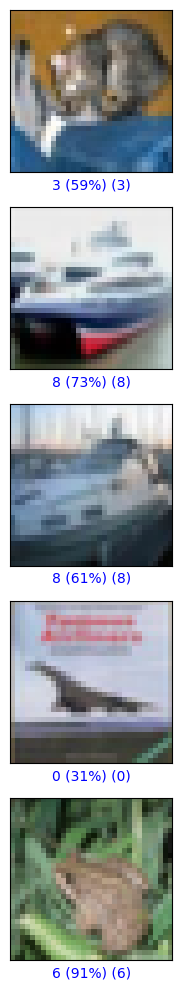

In [7]:
# Get predictions for the test images
predictions = model.predict(test_images)

# Define a function to plot images along with actual and predicted labels
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):2.0f}%) ({true_label})", color=color)

# Plot a few test images along with predicted and actual labels
num_images = 5
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 1, i + 1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()
